# RANDOM FOREST

### 20170396 김문정

### HW : Use Random Forest to do regression on Boston dataset. Explore hyperparameters.


In [161]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
import pandas as pd
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import mean_squared_error

In [162]:
Boston_House = 'bostonhouse.csv'
train = pd.read_csv(Boston_House, encoding='CP949')

In [163]:
trait = train.columns

In [164]:
x = train[trait[:13]]
y = train[trait[13]]

In [194]:
XTrain, XTest, yTrain, yTest = train_test_split(x, y, test_size = 0.3, random_state = 531)

In [235]:
RFreg= RandomForestRegressor(max_depth=5, random_state=500, n_estimators=30)

rmse is 4.012359252463174


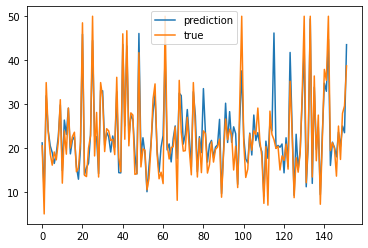

In [236]:
# max depth = 5, random state=500, n estimator=150
RFreg.fit(XTrain,yTrain)

y_pred = RFreg.predict(XTest)

plt.plot(range(len(y_pred)),y_pred, label = 'prediction')
plt.plot(range(len(y_pred)),yTest,label = 'true')

plt.legend()
print("rmse is", np.sqrt(mean_squared_error(yTest,y_pred)))

In [196]:
XTrain

,癤풠RIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,13.91340,0.0,18.10,0,0.713,6.208,95.0,2.2222,24,666.0,20.2,100.63,15.17
1,0.07022,0.0,4.05,0,0.510,6.020,47.2,3.5549,5,296.0,16.6,393.23,10.11
2,0.11132,0.0,27.74,0,0.609,5.983,83.5,2.1099,4,711.0,20.1,396.90,13.35
3,0.26938,0.0,9.90,0,0.544,6.266,82.8,3.2628,4,304.0,18.4,393.39,7.90
4,4.26131,0.0,18.10,0,0.770,6.112,81.3,2.5091,24,666.0,20.2,390.74,12.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,15.28800,0.0,18.10,0,0.671,6.649,93.3,1.3449,24,666.0,20.2,363.02,23.24
350,10.06230,0.0,18.10,0,0.584,6.833,94.3,2.0882,24,666.0,20.2,81.33,19.69
351,4.81213,0.0,18.10,0,0.713,6.701,90.0,2.5975,24,666.0,20.2,255.23,16.42
352,14.42080,0.0,18.10,0,0.740,6.461,93.3,2.0026,24,666.0,20.2,27.49,18.05


In [195]:
XTrain = XTrain.reset_index(drop=True)
XTest = XTest.reset_index(drop=True)
yTrain = yTrain.reset_index(drop=True)
yTest = yTest.reset_index(drop=True)

# Cross Validation

### hyperparameter

In [81]:
# Tree number
nTreeList = range(1, 301, 10)

# max_feature
mFeatList = range(2,14,1)

# Minimum Node Size(min_sample_leaf)
nNodeList = range(2,22,1)

In [82]:
print(len(nTreeList))
print(len(mFeatList))
print(len(nNodeList))

30
12
20


## CV with cross validation score in sklearn

##### warning : This will take some time :(( 

In [101]:
total_cv_list = np.zeros((30,20,12))
for a,t in enumerate(nTreeList):
    print(a)
    for b,n in enumerate(nNodeList):
        for c,m in enumerate(mFeatList):
            kfold = KFold(n_splits=5) 
            RFreg= RandomForestRegressor(min_samples_leaf=n, random_state=500, n_estimators=t,max_features=m)
            scores = cross_val_score(RFreg, XTrain, yTrain, cv=kfold) # model, train, target, cross validation
            total_cv_list[a,b,c]=np.mean(scores)
            del(scores)
            del(RFreg)
            del(kfold)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [136]:
np.where(total_cv_list==np.max(total_cv_list))

(array([6]), array([0]), array([5]))

## visualize

Text(0.5, 0, 'number of tree')

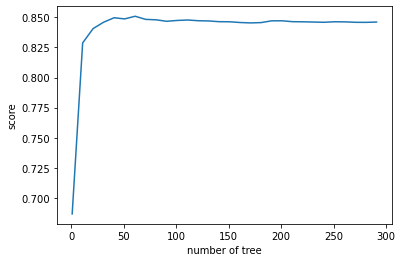

In [211]:
plt.plot(nTreeList,total_cv_list[:,0,5])
plt.ylabel('score')
plt.xlabel('number of tree')

Text(0.5, 0, 'max terminal node')

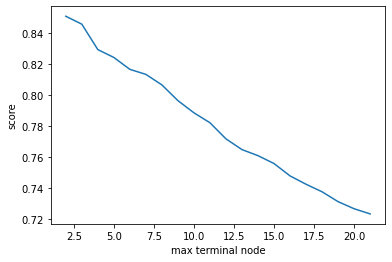

In [242]:
plt.plot(nNodeList,total_cv_list[6,:,5])
plt.ylabel('score')
plt.xlabel('max terminal node')

Text(0.5, 0, 'number of feature')

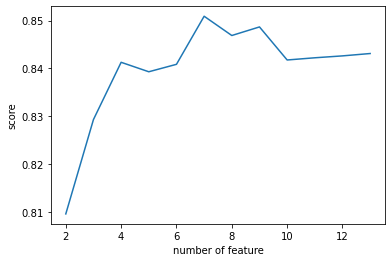

In [244]:
plt.plot(mFeatList,total_cv_list[6,0,:])
plt.ylabel('score')
plt.xlabel('number of feature')

## CV with MSE

### warning : This will take about 2 hours :(( 

In [205]:
from tqdm import tqdm 
import time

In [207]:
total_cv_list_mse = np.zeros((30,20,12))
for a,t in tqdm(enumerate(nTreeList)):
    for b,n in enumerate(nNodeList):
        for c,m in enumerate(mFeatList):
            kfold = KFold(n_splits=5) 
            RFreg= RandomForestRegressor(min_samples_leaf=n, random_state=500, n_estimators=t,max_features=m)
            mse_l = []
            for train_index, test_index in kf.split(XTrain):
                X_train, X_val = XTrain.loc[train_index], XTrain.loc[test_index]
                y_train, y_val = yTrain.loc[train_index], yTrain.loc[test_index]
                RFreg.fit(X_train,y_train)
                y_pred = RFreg.predict(X_val)
                mse = mean_squared_error(y_val,y_pred)
                mse_l.append(mse)
            total_cv_list_mse[a,b,c]=np.sqrt(np.mean(np.array(mse_l)))
            del(mse_l)
            del(RFreg)
            del(kfold)

30it [1:56:02, 232.08s/it]


In [212]:
np.where(total_cv_list_mse==np.min(total_cv_list_mse))
#totally same with cross validation score in sklearn package

(array([6]), array([0]), array([5]))

# visualize

Text(0.5, 0, 'number of tree')

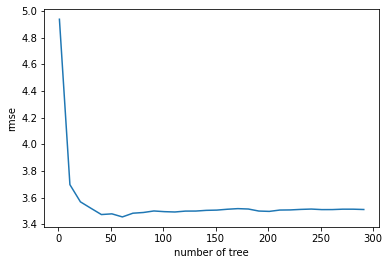

In [214]:
plt.plot(nTreeList,total_cv_list_mse[:,0,5])
plt.ylabel('rmse')
plt.xlabel('number of tree')

Text(0.5, 0, 'node')

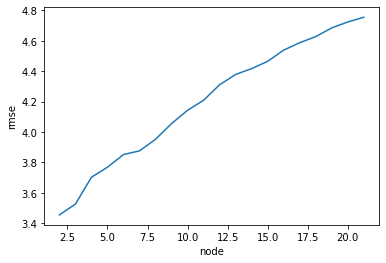

In [219]:
plt.plot(nNodeList,total_cv_list_mse[6,:,5])
plt.ylabel('rmse')
plt.xlabel('node')

Text(0.5, 0, 'number of feature')

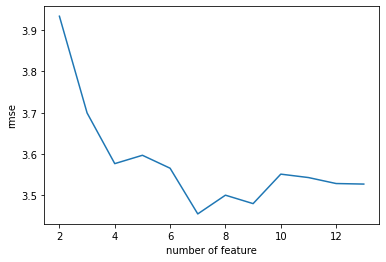

In [221]:
plt.plot(mFeatList,total_cv_list_mse[6,0,:])
plt.ylabel('rmse')
plt.xlabel('number of feature')

## Choose best hyperparameter

In [240]:
print("                Best parameter")
print("================================================")
print("number of Tree is",nTreeList[6])
print("minimum size of terminal node is",nNodeList[0])
print("number of Feature is",mFeatList[5])

                Best parameter
number of Tree is 61
minimum size of terminal node is 2
number of Feature is 7


rmse is 3.942005417202103


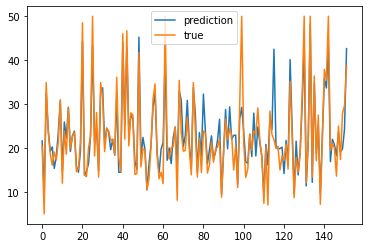

In [228]:
RFreg= RandomForestRegressor(min_samples_leaf=2, random_state=500, n_estimators=61,max_features=7)
RFreg.fit(XTrain,yTrain)

y_pred = RFreg.predict(XTest)

plt.plot(range(len(y_pred)),y_pred, label = 'prediction')
plt.plot(range(len(y_pred)),yTest,label = 'true')

plt.legend()

print("rmse is", np.sqrt(mean_squared_error(yTest,y_pred)))